In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandasql as ps

In [2]:
#importing dataset
data = pd.read_csv('/Users/chadvonholtz/Desktop/Virginia Tech Fullstack Academy Data Analytics Bootcamp Documents/Capstone/Datasets/Spotify_Data_1921_2020.csv', encoding='utf8')

In [3]:
#making a copy of the dataset
data_copy = data

In [4]:
#Want to see all the columns
pd.options.display.max_columns = 25

# Data Quality Checks

In [5]:
#looking at the top 5 records of the dataframe
data.head(5)

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1       Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                 Chapter 1.18 - Zamek kaniowski           0         1928   
3  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928

In [6]:
#looking at the bottom 5 records of the dataframe
data.tail(5)

acousticness                             artists  danceability  \
169904        0.1730              ['DripReport', 'Tyga']         0.875   
169905        0.0167  ['Leon Bridges', 'Terrace Martin']         0.719   
169906        0.5380               ['Kygo', 'Oh Wonder']         0.514   
169907        0.0714       ['Cash Cash', 'Andy Grammer']         0.646   
169908        0.1090                  ['Ingrid Andress']         0.512   

        duration_ms  energy  explicit                      id  \
169904       163800   0.443         1  4KppkflX7I3vJQk7urOJaS   
169905       167468   0.385         0  1ehhGlTvjtHo2e4xJFB0SZ   
169906       180700   0.539         0  52eycxprLhK3lPcRLbQiVk   
169907       167308   0.761         0  3wYOGJYD31sLRmBgCvWxa4   
169908       214787   0.428         0  60RFlt48hm0l4Fu0JoccOl   

        instrumentalness  key  liveness  loudness  mode  \
169904          0.000032    1    0.0891    -7.461     1   
169905          0.031300    8    0.1110   -10.907     1   
169906          0.002330    7    0.1080    -9.332     1   
169907          0.000000    1    0.2220    -2.557     1   
169908          0.000000    0    0.1050    -7.387     1   

                                  name  popularity release_date  speechiness  \
169904   Skechers (feat. Tyga) - Remix          75   2020-05-15       0.1430   
169905  Sweeter (feat. Terrace Martin)          64   2020-06-08       0.0403   
169906                How Would I Know          70   2020-05-29       0.1050   
169907                     I Found You          70   2020-02-28       0.0385   
169908           More Hearts Than Mine          65   2020-03-27       0.0271   

          tempo  valence  year  
169904  100.012    0.306  2020  
169905  128.000    0.270  2020  
169906  123.700    0.153  2020  
169907  129.916    0.472  2020  
169908   80.588    0.366  2020

#### Quick look at the dataframe. Looks like formatting will need to be done on the artists column. For now everything else looks alright.

In [7]:
#looking at the rows and columns of the dataframe
data.shape

(169909, 19)

In [8]:
#checking for duplicate records
data.duplicated().sum()

0

#### No duplicate records. Let's verify this.

In [9]:
#checking to see if there are track names with the same name
duplicate_names = data[data.duplicated(['name'])] 
duplicate_names
#it appears there are. Maybe they have a different track id.

acousticness                                            artists  \
70            0.9740           ['Frédéric Chopin', 'Vladimir Horowitz']   
83            0.9920           ['Frédéric Chopin', 'Vladimir Horowitz']   
91            0.9910           ['Frédéric Chopin', 'Vladimir Horowitz']   
310           0.8870  ['Ludwig van Beethoven', 'Chicago Symphony Orc...   
323           0.8360  ['Ludwig van Beethoven', 'Concertgebouworkest'...   
...              ...                                                ...   
169897        0.0220                                         ['Future']   
169900        0.0452                                 ['Kelly Clarkson']   
169902        0.0227                    ['Trey Songz', 'Summer Walker']   
169907        0.0714                      ['Cash Cash', 'Andy Grammer']   
169908        0.1090                                 ['Ingrid Andress']   

        danceability  duration_ms  energy  explicit                      id  \
70             0.188       236493  0.0891         0  6tD8hbtg9YvauF84fl15sd   
83             0.301       785427  0.0823         0  71FaVeFy9ZOiQRY4yOijey   
91             0.245       340973  0.0577         0  74rczPEWk2w3Fl8eENpzuf   
310            0.310       417720  0.2110         0  4p5b6f76shQR8eP0x39iyK   
323            0.313       561507  0.1830         0  5P3S4RWjamvpPiost5qPKA   
...              ...          ...     ...       ...                     ...   
169897         0.854       201907  0.5990         1  05TpY5Fov3Hgfp8V1KILZ8   
169900         0.655       216107  0.7190         0  0o58NWBiVXewJNfNDKQyjw   
169902         0.619       194576  0.7190         1  5QZ11AHm7xiytOGXGlxQi5   
169907         0.646       167308  0.7610         0  3wYOGJYD31sLRmBgCvWxa4   
169908         0.512       214787  0.4280         0  60RFlt48hm0l4Fu0JoccOl   

        instrumentalness  key  liveness  loudness  mode  \
70              0.896000    0    0.1240   -25.936     1   
83              0.852000    1    0.0870   -23.282     1   
91              0.882000    5    0.0704   -24.980     0   
310             0.858000    2    0.1320   -17.175     1   
323             0.480000    5    0.0856   -13.124     1   
...                  ...  ...       ...       ...   ...   
169897          0.000000    1    0.1730    -7.406     0   
169900          0.000018    2    0.1090    -7.400     1   
169902          0.000000    0    0.0839    -4.111     1   
169907          0.000000    1    0.2220    -2.557     1   
169908          0.000000    0    0.1050    -7.387     1   

                                                     name  popularity  \
70               Andante spianato in E-Flat Major, Op. 22           3   
83            Polonaise-Fantaisie in A-Flat Major, Op. 61           0   
91                        Nocturne F Minor, Op. 55, No. 1           0   
310     Symphony No. 7 in A Major, Op. 92: III. Presto...           0   
323     Symphony No. 4 in B-Flat Major, Op. 60: I. Ada...           0   
...                                                   ...         ...   
169897                                             Tycoon          66   
169900                                         I Dare You          69   
169902                    Back Home (feat. Summer Walker)          69   
169907                                        I Found You          70   
169908                              More Hearts Than Mine          65   

       release_date  speechiness    tempo  valence  year  
70             1928       0.0326   59.946   0.1640  1928  
83             1928       0.0382  137.296   0.0548  1928  
91             1928       0.0328   74.004   0.1050  1928  
310            1936       0.0541   91.799   0.2120  1936  
323            1936       0.0421  143.338   0.2350  1936  
...             ...          ...      ...      ...   ...  
169897   2020-05-15       0.3550  157.031   0.8490  2020  
169900   2020-04-16       0.0368  124.034   0.4350  2020  
169902   2020-04-29       0.1570   86.036

In [10]:
#looking at one song that has duplicate records
tycoon = data.loc[(data.name == 'Tycoon')]
tycoon

acousticness     artists  danceability  duration_ms  energy  explicit  \
161406        0.0223  ['Future']         0.858       203528   0.598         1   
169897        0.0220  ['Future']         0.854       201907   0.599         1   

                            id  instrumentalness  key  liveness  loudness  \
161406  1c9hQ4jqgVP10plon2B259               0.0    1     0.174    -7.407   
169897  05TpY5Fov3Hgfp8V1KILZ8               0.0    1     0.173    -7.406   

        mode    name  popularity release_date  speechiness    tempo  valence  \
161406     0  Tycoon          68   2020-04-01        0.357  157.030    0.850   
169897     0  Tycoon          66   2020-05-15        0.355  157.031    0.849   

        year  
161406  2020  
169897  2020

#### After doing some digging through Spotify, I noticed that Tycoon is the same song on two different alubms, a full lenth album release (5.15.2020) and a single release (4.1.2020). This is why the trackID is different. For this analysis we can treat these cases as duplicates and remove them since the song chacteristics are nearly identical and can skew analysis. 

In [11]:
#checking duplicates again where the artist name and the track name are the same
duplicate_names_artist = data[data.duplicated(['name', 'artists'])] 
duplicate_names_artist

acousticness                                            artists  \
70            0.9740           ['Frédéric Chopin', 'Vladimir Horowitz']   
83            0.9920           ['Frédéric Chopin', 'Vladimir Horowitz']   
91            0.9910           ['Frédéric Chopin', 'Vladimir Horowitz']   
469           0.9770                                ['Charlie Chaplin']   
609           0.9830  ['Sergei Rachmaninoff', 'William Kapell', 'Fri...   
...              ...                                                ...   
169878        0.5740                                ['Porte Diferente']   
169886        0.0236                                   ['Lil Uzi Vert']   
169897        0.0220                                         ['Future']   
169902        0.0227                    ['Trey Songz', 'Summer Walker']   
169908        0.1090                                 ['Ingrid Andress']   

        danceability  duration_ms  energy  explicit                      id  \
70             0.188       236493  0.0891         0  6tD8hbtg9YvauF84fl15sd   
83             0.301       785427  0.0823         0  71FaVeFy9ZOiQRY4yOijey   
91             0.245       340973  0.0577         0  74rczPEWk2w3Fl8eENpzuf   
469            0.530       193824  0.2090         0  4qmz6OTEv1FMZPtlE4TCWJ   
609            0.635        61467  0.0123         0  2qYaSlK0698oGi7Z9yrixw   
...              ...          ...     ...       ...                     ...   
169878         0.811       228466  0.5800         0  2OU13apOMaGALVlSb2PzPi   
169886         0.775       234627  0.7200         1  1Xd0PWZV3LCEGzc7fkjTeu   
169897         0.854       201907  0.5990         1  05TpY5Fov3Hgfp8V1KILZ8   
169902         0.619       194576  0.7190         1  5QZ11AHm7xiytOGXGlxQi5   
169908         0.512       214787  0.4280         0  60RFlt48hm0l4Fu0JoccOl   

        instrumentalness  key  liveness  loudness  mode  \
70                 0.896    0    0.1240   -25.936     1   
83                 0.852    1    0.0870   -23.282     1   
91                 0.882    5    0.0704   -24.980     0   
469                0.604   10    0.1150   -10.901     0   
609                0.955    0    0.1070   -27.297     1   
...                  ...  ...       ...       ...   ...   
169878             0.000    6    0.0748    -4.776     0   
169886             0.000   11    0.1140    -5.353     0   
169897             0.000    1    0.1730    -7.406     0   
169902             0.000    0    0.0839    -4.111     1   
169908             0.000    0    0.1050    -7.387     1   

                                                     name  popularity  \
70               Andante spianato in E-Flat Major, Op. 22           3   
83            Polonaise-Fantaisie in A-Flat Major, Op. 61           0   
91                        Nocturne F Minor, Op. 55, No. 1           0   
469           The Lone Prospector, Big Jim & Black Larsen           1   
609     Rhapsody on a Theme of Paganini, Op.43: Variat...           0   
...                                                   ...         ...   
169878                                       Por Tu Culpa          64   
169886                                                 P2          66   
169897                                             Tycoon          66   
169902                    Back Home (feat. Summer Walker)          69   
169908                              More Hearts Than Mine          65   

       release_date  speechiness    tempo  valence  year  
70             1928       0.0326   59.946   0.1640  1928  
83             1928       0.0382  137.296   0.0548  1928  
91             1928       0.0328   74.004   0.1050  1928  
469            1942       0.0533  109.746   0.5190  1942  
609            1945       0.0521   83.046   0.6100  1945  
...             ...          ...      ...      ...   ...  
169878   2020-02-26       0.0650   79.952   0.6590  2020  
169886   2020-03-13       0.1930  155.086   0.4900  2020  
169897   2020-05-15       0.3550  157.031

In [12]:
#looking at a description of the dataframe
data.describe()

acousticness   danceability   duration_ms         energy  \
count  169909.000000  169909.000000  1.699090e+05  169909.000000   
mean        0.493214       0.538150  2.314062e+05       0.488593   
std         0.376627       0.175346  1.213219e+05       0.267390   
min         0.000000       0.000000  5.108000e+03       0.000000   
25%         0.094500       0.417000  1.710400e+05       0.263000   
50%         0.492000       0.548000  2.086000e+05       0.481000   
75%         0.888000       0.667000  2.629600e+05       0.710000   
max         0.996000       0.988000  5.403500e+06       1.000000   

            explicit  instrumentalness            key       liveness  \
count  169909.000000     169909.000000  169909.000000  169909.000000   
mean        0.084863          0.161937       5.200519       0.206690   
std         0.278679          0.309329       3.515257       0.176796   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       2.000000       0.098400   
50%         0.000000          0.000204       5.000000       0.135000   
75%         0.000000          0.086800       8.000000       0.263000   
max         1.000000          1.000000      11.000000       1.000000   

            loudness           mode     popularity    speechiness  \
count  169909.000000  169909.000000  169909.000000  169909.000000   
mean      -11.370289       0.708556      31.556610       0.094058   
std         5.666765       0.454429      21.582614       0.149937   
min       -60.000000       0.000000       0.000000       0.000000   
25%       -14.470000       0.000000      12.000000       0.034900   
50%       -10.474000       1.000000      33.000000       0.045000   
75%        -7.118000       1.000000      48.000000       0.075400   
max         3.855000       1.000000     100.000000       0.969000   

               tempo        valence           year  
count  169909.000000  169909.000000  169909.000000  
mean      116.948017       0.532095    1977.223231  
std        30.726937       0.262408      25.593168  
min         0.000000       0.000000    1921.000000  
25%        93.516000       0.322000    1957.000000  
50%       114.778000       0.544000    1978.000000  
75%       135.712000       0.749000    1999.000000  
max       244.091000       1.000000    2020.000000

#### Noticing that the mean for the release year is 1977. That is roughly half way between 1921 and 2020. Therefore, there is a good number of records spread between 1921-2020

In [13]:
#checking out the info of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

#### Info is saying there are no null values. Also, it appears the data types are correct for the columns besides release_date

In [14]:
#verifying that there are no registered null values
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

#### Took a look at the data in excel. It does appear that there are some artists and track names that have special characters. These artist names and track names are undecipherable. It should be noted that these artists and tracks are relatively unpopular and should not effect the overall analysis. Mostly artists and tracks dealing with classical music. 

# Data Cleaning and Manipulation

In [15]:
#Dropping duplicates where artist name and track name are the same.
data_1 = data.drop_duplicates(
  subset = ['artists', 'name'],
  keep = 'last').reset_index(drop = True)

In [16]:
#checking the columns and rows for the new dataframe where the duplicate tracks are dropped.
data_1.shape

(156608, 19)

In [17]:
#Checking that the duplicates were dropped
duplicate_names_artist_1 = data_1[data_1.duplicated(['name', 'artists'])] 
duplicate_names_artist_1

Empty DataFrame
Columns: [acousticness, artists, danceability, duration_ms, energy, explicit, id, instrumentalness, key, liveness, loudness, mode, name, popularity, release_date, speechiness, tempo, valence, year]
Index: []

#### Duplicates were dropped.

### Tackling the artist column formatting

In [18]:
#special characters are showing up in the artists column
data_1[data_1['artists'].str.contains('ώ')]

acousticness                           artists  danceability  \
62             0.981              ['Αντώνης Νταλγκάς']         0.273   
64             0.989           ['Αντώνης Διαμαντίδης']         0.414   
80             0.977                ['Κώστας Δούσιας']         0.611   
138            0.987           ['Αντώνης Διαμαντίδης']         0.379   
142            0.986              ['Γιώργος Κατσαρός']         0.513   
...              ...                               ...           ...   
149633         0.948              ['Αντώνης Νταλγκάς']         0.551   
149637         0.980  ['Κώστας Πολίτης', 'Kaiti Grey']         0.537   
149664         0.982              ['Γιώργος Καβούρας']         0.742   
149680         0.970                 ['Άλκης Παγώνης']         0.280   
149893         0.965                 ['Κώστας Πέτκος']         0.592   

        duration_ms  energy  explicit                      id  \
62           200693  0.0958         0  3ysZe4AZtpys3VbZabN0Nh   
64           165520  0.2290         0  3zGslzrt12d41TKH7xBO5R   
80           240160  0.3800         0  428NvDHsWDUzEBUjvmfCFW   
138          190560  0.3150         0  4JjGOgKuFitoGVNXkgLDQK   
142          174667  0.2780         0  4KONpyi8cgWspQrWuW2f0k   
...             ...     ...       ...                     ...   
149633       186015  0.3970         0  0k3oKpHhujpT60wAOYiJdy   
149637       196547  0.2410         0  0kvsRDcne9YIZpOVKpbwhw   
149664       196533  0.2850         0  0nxR6YB2ADWbF2SbJMcSX2   
149680       195240  0.1850         0  0pG8yMfa0uIJMQeeuJtcRh   
149893       103954  0.3340         0  0q8xCvcozMSqR5AQLzp1ky   

        instrumentalness  key  liveness  loudness  mode  \
62              0.001090    1    0.6370   -20.217     1   
64              0.000670    7    0.1210   -10.564     1   
80              0.000192   10    0.1170   -16.791     1   
138             0.003050    2    0.3690    -9.775     1   
142             0.000000    2    0.6660   -10.100     1   
...                  ...  ...       ...       ...   ...   
149633          0.139000    1    0.0851    -8.257     0   
149637          0.000024    0    0.1970   -12.661     1   
149664          0.002710    6    0.1540    -9.235     0   
149680          0.385000    2    0.1500   -16.672     0   
149893          0.105000    7    0.5260   -12.869     0   

                               name  popularity release_date  speechiness  \
62               Μπεστενγκιάρ μανές           0   1930-01-01       0.0465   
64                Θεοδωράκης Γρίβας           0   1930-01-01       0.0587   
80                    Το καλογεράκι           0   1930-01-01       0.0586   
138               Δέσπω Καλαματιανή           0   1930-01-01       0.0525   
142     Μου έδωσες την καρδούλα σου           0   1930-01-01       0.0566   
...                             ...         ...          ...          ...   
149633                  Μπαγλαμάδες           0   1950-01-01       0.0536   
149637         Ποια μάνα είναι αυτή           0   1950-01-01       0.0618   
149664                Κακούργα μάνα           0   1950-01-01       0.0519   
149680                      Τζεμιλέ           0   1950-01-01       0.0443   
149893       Φεγγάρι μου λαμπρότατο           0   1953-01-01       0.0403   

          tempo  valence  year  
62       86.281    0.180  1930  
64       74.796    0.325  1930  
80      147.909    0.654  1930  
138      97.433    0.551  1930  
142     111.084    0.631  1930  
...         ...      ...   ...  
149633  127.915    0.686  1950  
149637  122.696    0.782  1950  
149664  114.569    0.915  1950  
149680   96.671    0.326  1950  
149893   99.324    0.914  1953  

[171 rows x 19 columns]

In [19]:
#Importing unidecode to change the coding of the artist column 
#This will translate all of the special characters to latin characters
from unidecode import unidecode

In [20]:
#creating a new column called artists2 that will translate the special characters to latin characters
data_1['artists2'] = data_1['artists'].apply(unidecode)

In [21]:
#verifying that that the coding worked
data_1[data_1['artists2'].str.contains('ώ')]
#it worked

Empty DataFrame
Columns: [acousticness, artists, danceability, duration_ms, energy, explicit, id, instrumentalness, key, liveness, loudness, mode, name, popularity, release_date, speechiness, tempo, valence, year, artists2]
Index: []

In [22]:
#Veryfying that no special characters exist in the new artists2 column
#setting the artists2 column to a list
artist_list = data_1.artists2.tolist()
artist_list

["['Carl Woitschach']",
 "['Seweryn Goszczynski']",
 "['Francisco Canaro']",
 "['Carl Woitschach']",
 "['Francisco Canaro', 'Charlo']",
 "['Seweryn Goszczynski']",
 "['Ludwig van Beethoven', 'Staatskapelle Berlin', 'Richard Strauss']",
 "['George Butterworth', 'John Cameron']",
 "['Francisco Canaro', 'Luis Scalon']",
 "['Thomas Arne', 'John Heddle Nash']",
 "['Francisco Canaro']",
 "['Francisco Canaro']",
 "['Francisco Canaro']",
 "['Francisco Canaro', 'Charlo']",
 "['Roger Quilter', 'John Heddle Nash']",
 "['Hafiz Yasar']",
 "['Seweryn Goszczynski']",
 "['Francisco Canaro', 'Charlo']",
 "['Shungi Music Crew']",
 "['George Butterworth', 'John Cameron']",
 "['Ignacio Corsini']",
 "['Perchicot']",
 "['Francisco Canaro', 'Charlo']",
 "['Francisco Canaro']",
 "['Seweryn Goszczynski']",
 "['Seweryn Goszczynski']",
 "['Francisco Canaro']",
 "['Seweryn Goszczynski']",
 "['Seweryn Goszczynski']",
 "['Francisco Canaro']",
 "['Shungi Music Crew']",
 "['Francisco Canaro', 'Charlo']",
 "['Paul Whi

In [23]:
#turing the artists2 column list into a string
artists_string = ''.join(artist_list)
artists_string

'[\'Carl Woitschach\'][\'Seweryn Goszczynski\'][\'Francisco Canaro\'][\'Carl Woitschach\'][\'Francisco Canaro\', \'Charlo\'][\'Seweryn Goszczynski\'][\'Ludwig van Beethoven\', \'Staatskapelle Berlin\', \'Richard Strauss\'][\'George Butterworth\', \'John Cameron\'][\'Francisco Canaro\', \'Luis Scalon\'][\'Thomas Arne\', \'John Heddle Nash\'][\'Francisco Canaro\'][\'Francisco Canaro\'][\'Francisco Canaro\'][\'Francisco Canaro\', \'Charlo\'][\'Roger Quilter\', \'John Heddle Nash\'][\'Hafiz Yasar\'][\'Seweryn Goszczynski\'][\'Francisco Canaro\', \'Charlo\'][\'Shungi Music Crew\'][\'George Butterworth\', \'John Cameron\'][\'Ignacio Corsini\'][\'Perchicot\'][\'Francisco Canaro\', \'Charlo\'][\'Francisco Canaro\'][\'Seweryn Goszczynski\'][\'Seweryn Goszczynski\'][\'Francisco Canaro\'][\'Seweryn Goszczynski\'][\'Seweryn Goszczynski\'][\'Francisco Canaro\'][\'Shungi Music Crew\'][\'Francisco Canaro\', \'Charlo\'][\'Paul Whiteman\'][\'Francisco Canaro\', \'Charlo\'][\'Ignacio Corsini\'][\'Ted We

In [24]:
#creating a function that will show me all the unique characters in the artists 2 column
def unique_string(string1):
 
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in string1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    return(unique_list)

#printing the list of unique characters
a = unique_string
character_list = a(artists_string)
print(character_list)
#looks like the coding worked


['[', "'", 'C', 'a', 'r', 'l', ' ', 'W', 'o', 'i', 't', 's', 'c', 'h', ']', 'S', 'e', 'w', 'y', 'n', 'G', 'z', 'k', 'F', ',', 'L', 'u', 'd', 'g', 'v', 'B', 'p', 'R', 'J', 'm', 'T', 'A', 'H', 'N', 'Q', 'f', 'Y', 'M', 'I', 'P', '&', 'O', 'j', 'V', 'E', 'D', '.', 'K', 'b', 'q', '"', '3', 'X', 'x', '2', '0', '1', '4', '/', 'Z', '-', ')', '7', 'U', '\\', '(', '9', '5', '!', '6', '8', '`', '$', '*', '+', ';', ':', '~', '?', '|', '<', '>', '^', '_', '#']


In [25]:
#making a list of all the unique artist names to verify the translation worked
def unique(list1):
 
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

unique(artist_list)
#appears it worked well

['Carl Woitschach']
['Seweryn Goszczynski']
['Francisco Canaro']
['Francisco Canaro', 'Charlo']
['Ludwig van Beethoven', 'Staatskapelle Berlin', 'Richard Strauss']
['George Butterworth', 'John Cameron']
['Francisco Canaro', 'Luis Scalon']
['Thomas Arne', 'John Heddle Nash']
['Roger Quilter', 'John Heddle Nash']
['Hafiz Yasar']
['Shungi Music Crew']
['Ignacio Corsini']
['Perchicot']
['Paul Whiteman']
['Ted Weems & His Orchestra']
['Taj Mahal']
['John Raitt']
['Leroy Carr']
['Frederic Chopin', 'Vladimir Horowitz']
['Hikmet Riza Hanim']
['Elsie Houston']
['Antones Ntalgkas']
['Stellakis Perpiniadis']
['Antones Diamantides']
['S. Loukopoulos', 'Klarino G. Anestopoulos', 'Klarino KOstas Giaouzos', 'Klarinos Nikos Karakostas']
['Paradosiako I. KIriakatis']
['Moune De Rivel']
['Dimitris Gkogkos']
['Giorgos Papasideris']
['Petros Epitropakis', 'Antonis Kalampousis']
['Francisco Canaro', 'Luis Diaz']
['Sotiris Stasinopoulos']
['Robert Francis']
['Francisco Canaro', 'Roberto Maida']
['The Caress

In [26]:
##Removing [] and '' from artist column
data_1["artists2"]=data_1["artists2"].str.replace("[", "")
data_1["artists2"]=data_1["artists2"].str.replace("]", "")
data_1["artists2"]=data_1["artists2"].str.replace("'", "")

data_1.head()

/var/folders/rq/ntq2lcs97sz603g1k97v_2gw0000gn/T/ipykernel_1220/691609281.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_1["artists2"]=data_1["artists2"].str.replace("[", "")
/var/folders/rq/ntq2lcs97sz603g1k97v_2gw0000gn/T/ipykernel_1220/691609281.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_1["artists2"]=data_1["artists2"].str.replace("]", "")


acousticness                         artists  danceability  duration_ms  \
0         0.995             ['Carl Woitschach']         0.708       158648   
1         0.604         ['Seweryn Goszczyński']         0.749       104300   
2         0.995            ['Francisco Canaro']         0.781       180760   
3         0.988             ['Carl Woitschach']         0.555       153967   
4         0.995  ['Francisco Canaro', 'Charlo']         0.683       162493   

   energy  explicit                      id  instrumentalness  key  liveness  \
0   0.195         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   10     0.151   
1   0.220         0  6L63VW0PibdM1HDSBoqnoM             0.000    5     0.119   
2   0.130         0  6M94FkXd15sOAOQYRnWPN8             0.887    1     0.111   
3   0.421         0  6OJjveoYwJdIt76y0Pxpxw             0.836    1     0.105   
4   0.207         0  6OaJ8Bh7lsBeYoBmwmo2nh             0.206    9     0.337   

   loudness  mode                                           name  popularity  \
0   -12.428     1                    Singende Bataillone 1. Teil           0   
1   -19.924     0                 Chapter 1.18 - Zamek kaniowski           0   
2   -14.734     0  Bebamos Juntos - Instrumental (Remasterizado)           0   
3    -9.878     1                            Per aspera ad astra           0   
4    -9.801     0               Moneda Corriente - Remasterizado           0   

  release_date  speechiness    tempo  valence  year                  artists2  
0         1928       0.0506  118.469    0.779  1928           Carl Woitschach  
1         1928       0.9290  107.177    0.880  1928       Seweryn Goszczynski  
2   1928-09-25       0.0926  108.003    0.720  1928          Francisco Canaro  
3         1928       0.0474  123.310    0.857  1928           Carl Woitschach  
4   1928-10-03       0.1270  119.833    0.493  1928  Francisco Canaro, Charlo

In [27]:
#dropping the artists column with the special characters
data_1 = data_1.drop('artists', axis=1)
data_1.head(5)

acousticness  danceability  duration_ms  energy  explicit  \
0         0.995         0.708       158648   0.195         0   
1         0.604         0.749       104300   0.220         0   
2         0.995         0.781       180760   0.130         0   
3         0.988         0.555       153967   0.421         0   
4         0.995         0.683       162493   0.207         0   

                       id  instrumentalness  key  liveness  loudness  mode  \
0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   10     0.151   -12.428     1   
1  6L63VW0PibdM1HDSBoqnoM             0.000    5     0.119   -19.924     0   
2  6M94FkXd15sOAOQYRnWPN8             0.887    1     0.111   -14.734     0   
3  6OJjveoYwJdIt76y0Pxpxw             0.836    1     0.105    -9.878     1   
4  6OaJ8Bh7lsBeYoBmwmo2nh             0.206    9     0.337    -9.801     0   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1                 Chapter 1.18 - Zamek kaniowski           0         1928   
2  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
3                            Per aspera ad astra           0         1928   
4               Moneda Corriente - Remasterizado           0   1928-10-03   

   speechiness    tempo  valence  year                  artists2  
0       0.0506  118.469    0.779  1928           Carl Woitschach  
1       0.9290  107.177    0.880  1928       Seweryn Goszczynski  
2       0.0926  108.003    0.720  1928          Francisco Canaro  
3       0.0474  123.310    0.857  1928           Carl Woitschach  
4       0.1270  119.833    0.493  1928  Francisco Canaro, Charlo

In [28]:
#renaming the artist2 column to artist
data_1 = data_1.rename(columns={'artists2': 'artists'})
data_1.head(5)

acousticness  danceability  duration_ms  energy  explicit  \
0         0.995         0.708       158648   0.195         0   
1         0.604         0.749       104300   0.220         0   
2         0.995         0.781       180760   0.130         0   
3         0.988         0.555       153967   0.421         0   
4         0.995         0.683       162493   0.207         0   

                       id  instrumentalness  key  liveness  loudness  mode  \
0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   10     0.151   -12.428     1   
1  6L63VW0PibdM1HDSBoqnoM             0.000    5     0.119   -19.924     0   
2  6M94FkXd15sOAOQYRnWPN8             0.887    1     0.111   -14.734     0   
3  6OJjveoYwJdIt76y0Pxpxw             0.836    1     0.105    -9.878     1   
4  6OaJ8Bh7lsBeYoBmwmo2nh             0.206    9     0.337    -9.801     0   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1                 Chapter 1.18 - Zamek kaniowski           0         1928   
2  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
3                            Per aspera ad astra           0         1928   
4               Moneda Corriente - Remasterizado           0   1928-10-03   

   speechiness    tempo  valence  year                   artists  
0       0.0506  118.469    0.779  1928           Carl Woitschach  
1       0.9290  107.177    0.880  1928       Seweryn Goszczynski  
2       0.0926  108.003    0.720  1928          Francisco Canaro  
3       0.0474  123.310    0.857  1928           Carl Woitschach  
4       0.1270  119.833    0.493  1928  Francisco Canaro, Charlo

In [29]:
#creating a new column called primary artist by removing all characters after the comma in the artists column
data_1['primary_artist'] = data_1['artists'].str.replace(',.*', '', regex=True)
data_1[['primary_artist']].sample(20)

primary_artist
69249            James Newton Howard
109305                 Stevie Wonder
33911                Various Artists
28234               Hillsong Worship
108340                     Phil Ochs
18010                         ZZ Top
67237                    Peter Allen
39024                   Eric Clapton
92722                         Slayer
138773                 Nature Sounds
94401              The White Stripes
54826                    Luis Miguel
151960                  The Spinners
149534                   Ralph Burns
16557                     Tom Lehrer
68717                          Wilco
112867                  Jack Johnson
50720               Xrisoula Vazoura
72931   Woody Herman & His Orchestra
38345                      Gal Costa

In [30]:
#verifying that the strip worked with records with multiple artists
data_1.loc[data_1['primary_artist'] == 'Giuseppe Verdi'].head(5)
#appears that it worked properly

acousticness  danceability  duration_ms  energy  explicit  \
408         0.952         0.370       194400  0.3370         0   
420         0.927         0.681        33627  0.2190         0   
451         0.915         0.550        64533  0.1100         0   
573         0.978         0.440        96987  0.3440         0   
586         0.986         0.299       216733  0.0937         0   

                         id  instrumentalness  key  liveness  loudness  mode  \
408  4r7i4P6wmlIpkqRLzvaUPL          0.232000    3     0.482    -9.265     1   
420  4yV1ktFQGXfm8FTpzAQxcX          0.013000    0     0.219   -19.270     1   
451  583xLr1XMFndDyouSF8GQK          0.000127   10     0.234   -18.849     0   
573  4rX7FpMmKt18dsj4loFKLj          0.009000   11     0.156   -14.112     1   
586  4vSaDa7oGZ2lheLCgAAsj9          0.002370    1     0.101   -20.377     1   

                                                  name  popularity  \
408  Verdi : La forza del destino : Act 4 "Io muoio...           0   
420  Verdi : La forza del destino : Act 2 "Che vedo...           0   
451  Verdi : La forza del destino : Act 2 "Chi mi c...           0   
573              La Traviata: Signora - Che t'accadde?           0   
586                           La Traviata: Di Provenza           0   

    release_date  speechiness    tempo  valence  year  \
408         1942       0.1180   72.060    0.119  1942   
420         1942       0.3130  128.379    0.721  1942   
451         1942       0.4340   85.923    0.254  1942   
573         1946       0.1110   96.936    0.203  1946   
586         1946       0.0434   85.912    0.242  1946   

                                               artists  primary_artist  
408  Giuseppe Verdi, Gino Marinuzzi, Carlo Tagliabu...  Giuseppe Verdi  
420  Giuseppe Verdi, Gino Marinuzzi, Bruno Erminero...  Giuseppe Verdi  
451  Giuseppe Verdi, Gino Marinuzzi, Maria Caniglia...  Giuseppe Verdi  
573                   Giuseppe Verdi, Arturo Toscanini  Giuseppe Verdi  
586                   Giuseppe Verdi, Arturo Toscanini  Giuseppe Verdi

### Translating the name column

In [31]:
#special characters are showing up in the name column
data_1[['name']][data_1['name'].str.contains('ώ')].head(5)

name
670           Πριγκιπιώτισσα
926        Νησιώτικος συρτός
1209            Πειραιώτισσα
7400     Μάνα με μαχαιρώσανε
7418  Αρρώστησα μαννούλα μου

In [32]:
#creating a new column called name2 that will translate the special characters to latin characters
data_1['name2'] = data_1['name'].apply(unidecode)

In [33]:
#verfying that special characters no longer show up in the name2 column
data_1[['name2']][data_1['name2'].str.contains('ώ')].head(5)

Empty DataFrame
Columns: [name2]
Index: []

In [34]:
#dropping the name column with the special characters
data_1 = data_1.drop('name', axis=1)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156608 entries, 0 to 156607
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      156608 non-null  float64
 1   danceability      156608 non-null  float64
 2   duration_ms       156608 non-null  int64  
 3   energy            156608 non-null  float64
 4   explicit          156608 non-null  int64  
 5   id                156608 non-null  object 
 6   instrumentalness  156608 non-null  float64
 7   key               156608 non-null  int64  
 8   liveness          156608 non-null  float64
 9   loudness          156608 non-null  float64
 10  mode              156608 non-null  int64  
 11  popularity        156608 non-null  int64  
 12  release_date      156608 non-null  object 
 13  speechiness       156608 non-null  float64
 14  tempo             156608 non-null  float64
 15  valence           156608 non-null  float64
 16  year              15

In [35]:
#renaming the artist2 column to artist
data_1 = data_1.rename(columns={'name2': 'name'})
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156608 entries, 0 to 156607
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      156608 non-null  float64
 1   danceability      156608 non-null  float64
 2   duration_ms       156608 non-null  int64  
 3   energy            156608 non-null  float64
 4   explicit          156608 non-null  int64  
 5   id                156608 non-null  object 
 6   instrumentalness  156608 non-null  float64
 7   key               156608 non-null  int64  
 8   liveness          156608 non-null  float64
 9   loudness          156608 non-null  float64
 10  mode              156608 non-null  int64  
 11  popularity        156608 non-null  int64  
 12  release_date      156608 non-null  object 
 13  speechiness       156608 non-null  float64
 14  tempo             156608 non-null  float64
 15  valence           156608 non-null  float64
 16  year              15

### Changing duration from milliseconds to seconds

In [36]:
#dividing the duration ms_seconds column by 1000 to convert to seconds
data_1['duration_seconds'] = data['duration_ms']/1000
#rounding the duration_seconds column 
data_1['duration_seconds'] = data_1['duration_seconds'].round()
data_1.head()

acousticness  danceability  duration_ms  energy  explicit  \
0         0.995         0.708       158648   0.195         0   
1         0.604         0.749       104300   0.220         0   
2         0.995         0.781       180760   0.130         0   
3         0.988         0.555       153967   0.421         0   
4         0.995         0.683       162493   0.207         0   

                       id  instrumentalness  key  liveness  loudness  mode  \
0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   10     0.151   -12.428     1   
1  6L63VW0PibdM1HDSBoqnoM             0.000    5     0.119   -19.924     0   
2  6M94FkXd15sOAOQYRnWPN8             0.887    1     0.111   -14.734     0   
3  6OJjveoYwJdIt76y0Pxpxw             0.836    1     0.105    -9.878     1   
4  6OaJ8Bh7lsBeYoBmwmo2nh             0.206    9     0.337    -9.801     0   

   popularity release_date  speechiness    tempo  valence  year  \
0           0         1928       0.0506  118.469    0.779  1928   
1           0         1928       0.9290  107.177    0.880  1928   
2           0   1928-09-25       0.0926  108.003    0.720  1928   
3           0         1928       0.0474  123.310    0.857  1928   
4           0   1928-10-03       0.1270  119.833    0.493  1928   

                    artists       primary_artist  \
0           Carl Woitschach      Carl Woitschach   
1       Seweryn Goszczynski  Seweryn Goszczynski   
2          Francisco Canaro     Francisco Canaro   
3           Carl Woitschach      Carl Woitschach   
4  Francisco Canaro, Charlo     Francisco Canaro   

                                            name  duration_seconds  
0                    Singende Bataillone 1. Teil             159.0  
1                 Chapter 1.18 - Zamek kaniowski             282.0  
2  Bebamos Juntos - Instrumental (Remasterizado)             104.0  
3                            Per aspera ad astra             181.0  
4               Moneda Corriente - Remasterizado             688.0

### Function to add music decade as a column

In [37]:
def songdecade(year):
    if year >= 1921 and year < 1930:
        return('1920s')
    elif year >= 1930 and year < 1940:
        return('1930s')
    elif year >= 1940 and year < 1950:
        return ('1940s')
    elif year >= 1950 and year < 1960:
        return ('1950s')
    elif year >= 1960 and year < 1970:
        return ('1960s')
    elif year >= 1970 and year < 1980:
        return ('1970s')
    elif year >= 1980 and year < 1990:
        return ('1980s')
    elif year >= 1990 and year < 2000:
        return ('1990s')
    elif year >= 2000 and year < 2010:
        return ('2000s')
    elif year >= 2010 and year < 2020:
        return ('2010s')
    else:
        return ('2020s')

In [38]:
#using apply to make a new column called decade passing the year column throug the song decade function.
data_1['decade'] = data_1['year'].apply(songdecade)
#checking to see that the function worked
data_1.head()

acousticness  danceability  duration_ms  energy  explicit  \
0         0.995         0.708       158648   0.195         0   
1         0.604         0.749       104300   0.220         0   
2         0.995         0.781       180760   0.130         0   
3         0.988         0.555       153967   0.421         0   
4         0.995         0.683       162493   0.207         0   

                       id  instrumentalness  key  liveness  loudness  mode  \
0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   10     0.151   -12.428     1   
1  6L63VW0PibdM1HDSBoqnoM             0.000    5     0.119   -19.924     0   
2  6M94FkXd15sOAOQYRnWPN8             0.887    1     0.111   -14.734     0   
3  6OJjveoYwJdIt76y0Pxpxw             0.836    1     0.105    -9.878     1   
4  6OaJ8Bh7lsBeYoBmwmo2nh             0.206    9     0.337    -9.801     0   

   popularity release_date  speechiness    tempo  valence  year  \
0           0         1928       0.0506  118.469    0.779  1928   
1           0         1928       0.9290  107.177    0.880  1928   
2           0   1928-09-25       0.0926  108.003    0.720  1928   
3           0         1928       0.0474  123.310    0.857  1928   
4           0   1928-10-03       0.1270  119.833    0.493  1928   

                    artists       primary_artist  \
0           Carl Woitschach      Carl Woitschach   
1       Seweryn Goszczynski  Seweryn Goszczynski   
2          Francisco Canaro     Francisco Canaro   
3           Carl Woitschach      Carl Woitschach   
4  Francisco Canaro, Charlo     Francisco Canaro   

                                            name  duration_seconds decade  
0                    Singende Bataillone 1. Teil             159.0  1920s  
1                 Chapter 1.18 - Zamek kaniowski             282.0  1920s  
2  Bebamos Juntos - Instrumental (Remasterizado)             104.0  1920s  
3                            Per aspera ad astra             181.0  1920s  
4               Moneda Corriente - Remasterizado             688.0  1920s

In [39]:
#checking to see if function worked
data_1.tail()

acousticness  danceability  duration_ms  energy  explicit  \
156603        0.1730         0.875       163800   0.443         1   
156604        0.0167         0.719       167468   0.385         0   
156605        0.5380         0.514       180700   0.539         0   
156606        0.0714         0.646       167308   0.761         0   
156607        0.1090         0.512       214787   0.428         0   

                            id  instrumentalness  key  liveness  loudness  \
156603  4KppkflX7I3vJQk7urOJaS          0.000032    1    0.0891    -7.461   
156604  1ehhGlTvjtHo2e4xJFB0SZ          0.031300    8    0.1110   -10.907   
156605  52eycxprLhK3lPcRLbQiVk          0.002330    7    0.1080    -9.332   
156606  3wYOGJYD31sLRmBgCvWxa4          0.000000    1    0.2220    -2.557   
156607  60RFlt48hm0l4Fu0JoccOl          0.000000    0    0.1050    -7.387   

        mode  popularity release_date  speechiness    tempo  valence  year  \
156603     1          75   2020-05-15       0.1430  100.012    0.306  2020   
156604     1          64   2020-06-08       0.0403  128.000    0.270  2020   
156605     1          70   2020-05-29       0.1050  123.700    0.153  2020   
156606     1          70   2020-02-28       0.0385  129.916    0.472  2020   
156607     1          65   2020-03-27       0.0271   80.588    0.366  2020   

                             artists  primary_artist  \
156603              DripReport, Tyga      DripReport   
156604  Leon Bridges, Terrace Martin    Leon Bridges   
156605               Kygo, Oh Wonder            Kygo   
156606       Cash Cash, Andy Grammer       Cash Cash   
156607                Ingrid Andress  Ingrid Andress   

                                  name  duration_seconds decade  
156603   Skechers (feat. Tyga) - Remix             219.0  2020s  
156604  Sweeter (feat. Terrace Martin)             444.0  2020s  
156605                How Would I Know             182.0  2020s  
156606                     I Found You             224.0  2020s  
156607           More Hearts Than Mine             240.0  2020s

In [40]:
#checking a larger sample to make sure the function worked.
data_1.sample(20)

acousticness  danceability  duration_ms  energy  explicit  \
84662       0.000579         0.532       493933  0.9410         0   
71723       0.988000         0.582       203067  0.0317         0   
108961      0.004070         0.439       212067  0.7950         0   
141279      0.699000         0.515       161667  0.5440         0   
150413      0.918000         0.126        67440  0.6260         0   
118415      0.018000         0.429       386667  0.7300         0   
61537       0.929000         0.475       197067  0.1440         0   
125357      0.688000         0.654       360307  0.3360         0   
25941       0.056300         0.416       241120  0.8470         0   
28065       0.077100         0.431       316987  0.8760         0   
23746       0.627000         0.684       150867  0.2670         0   
148185      0.907000         0.458       218000  0.1300         0   
93048       0.241000         0.703       316107  0.9490         0   
16414       0.967000         0.256       249667  0.2630         0   
73853       0.457000         0.535       156067  0.4330         0   
100547      0.170000         0.571       178213  0.8470         0   
68533       0.960000         0.394       229893  0.0595         0   
25358       0.011600         0.676       205467  0.9580         0   
66162       0.576000         0.393       185613  0.2790         0   
68331       0.030000         0.658       249867  0.6280         0   

                            id  instrumentalness  key  liveness  loudness  \
84662   5CPXR6lDTvngxtmMZxnWmC          0.052700    9    0.1500    -9.025   
71723   3AYv89siAYtbiWDcDxOjmY          0.000261    0    0.0595   -21.242   
108961  11Wda6v2dXnklOQYnJANjs          0.001140    2    0.2960    -9.424   
141279  0eXGEtkNBqiv6fuUMGSjk8          0.000000    0    0.2090    -2.296   
150413  7u95Vvht9MPiLDM5AMILZk          0.134000    0    0.1480    -9.491   
118415  4gPnDCCNHUQcbrA8netoyc          0.000373    9    0.2180    -6.173   
61537   7h8Y5ozXb7D7COLHahSq4b          0.000005    9    0.1500   -15.436   
125357  6qzHVB4x1r29BDmsEiex0v          0.014700    5    0.1140   -10.838   
25941   09s0qq5sbu7rQua520HHOu          0.000009    2    0.0814    -5.689   
28065   2lfmRyTLtsTCkLwMQcFSQk          0.000018    4    0.0998    -6.109   
23746   0AAsZvbbE1dGnveap3LJnz          0.001170    2    0.1170   -11.032   
148185  0KJQx6vXu8DsVwAsJyCn4n          0.000000   11    0.1640   -14.575   
93048   4F8IB14Sjvqb9qJUOxndRZ          0.001810    0    0.1670    -3.633   
16414   7epbq4AVxaug8peQSKOZTm          0.000447    0    0.2280    -9.930   
73853   0vXhvlYN43mPBuXWWcyvjo          0.000000    7    0.1140    -8.401   
100547  3knAN42OYhHnnmUGOXUiPM          0.000038    9    0.2730    -5.694   
68533   7d0MPMtkaYEyiIP0wyJ2ZC          0.877000    5    0.1200   -24.949   
25358   0bvMEzohKfesdBPfXFg8d9          0.000023    7    0.0390    -4.355   
66162   5c3alRvCyBqvOq9DCnnrBi          0.000002    1    0.1180   -16.023   
68331   6sSg6sSHMzaAeuQNUGgEeH          0.000001    6    0.0697    -8.558   

        mode  popularity release_date  speechiness    tempo  valence  year  \
84662      1          60   1992-06-30       0.0465  102.198   0.2780  1992   
71723      1           8         1930       0.0462   81.228   0.2440  1930   
108961     1          40      1970-06       0.0314   84.846   0.7890  1970   
141279     1           0         1950       0.0288  144.013   0.6900  1950   
150413     0          13         1958       0.0491   93.245   0.0541  1958   
118415     0          40         1976       0.0359  106.293   0.5540  1976   
61537      0          37   1993-10-05       0.0378  137.376   0.1130  1993   
125357     0          21         1960       0.0328  108.876   0.2580  1960   
25941      0          27         1989       0.0924  187.130   0.8730  1989   
28065      1          49   2013-04-09       0.0658  160.000   0.5190  2013   
23746      1          17         1965       0.0351  116.122   0.4970  1965   
1481

### Making another function to name the key of each song (i.e C Major)

In [41]:
def key(x):
    key = x[0]
    mode = x[1]
    if key == 0 and mode == 0:
        return('C minor')
    elif key == 0 and mode == 1:
        return ('C Major')
    elif key == 1 and mode == 0:
        return('C#/Db minor')
    elif key == 1 and mode == 1:
        return ('C#/Db Major')
    elif key == 2 and mode == 0:
        return('D minor')
    elif key == 2 and mode == 1:
        return ('D Major')
    elif key == 3 and mode == 0:
        return('D#/Eb minor')
    elif key == 3 and mode == 1:
        return ('D#/Eb Major')
    elif key == 4 and mode == 0:
        return('E minor')
    elif key == 4 and mode == 1:
        return ('E Major')
    elif key == 5 and mode == 0:
        return('F minor')
    elif key == 5 and mode == 1:
        return ('F Major')
    elif key == 6 and mode == 0:
        return('F#/Gb minor')
    elif key == 6 and mode == 1:
        return ('F#/Gb Major')
    elif key == 7 and mode == 0:
        return('G minor')
    elif key == 7 and mode == 1:
        return ('G Major')
    elif key == 8 and mode == 0:
        return('G#/Ab minor')
    elif key == 8 and mode == 1:
        return ('G#/Ab Major')
    elif key == 9 and mode == 0:
        return('A minor')
    elif key == 9 and mode == 1:
        return ('A Major')
    elif key == 10 and mode == 0:
        return('A#/Bb minor')
    elif key == 10 and mode == 1:
        return ('A#/Bb Major')
    elif key == 11 and mode == 0:
        return('B minor')
    elif key == 11 and mode == 1:
        return ('B Major')
    else:
        return ('No Key Detected')

In [42]:
#using apply to make a new column called song_key passing the key and mode column through the key function.
data_1['song_key'] = data_1[['key', 'mode']].apply(key, axis=1)
#checking to see that the function worked
data_1[['key', 'mode', 'song_key']].sample(20)

key  mode     song_key
79878    10     1  A#/Bb Major
145501    7     1      G Major
140767    8     1  G#/Ab Major
122228    5     1      F Major
40213     0     1      C Major
52060     6     1  F#/Gb Major
77265     6     1  F#/Gb Major
150045    1     1  C#/Db Major
8889      5     1      F Major
88001     4     0      E minor
63871    11     0      B minor
103898    6     0  F#/Gb minor
102505    8     1  G#/Ab Major
104973    8     1  G#/Ab Major
144998    2     1      D Major
112016    8     0  G#/Ab minor
26416     5     0      F minor
65871     9     0      A minor
147796    5     1      F Major
56513     8     1  G#/Ab Major

# Exploratory Analysis

In [43]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156608 entries, 0 to 156607
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      156608 non-null  float64
 1   danceability      156608 non-null  float64
 2   duration_ms       156608 non-null  int64  
 3   energy            156608 non-null  float64
 4   explicit          156608 non-null  int64  
 5   id                156608 non-null  object 
 6   instrumentalness  156608 non-null  float64
 7   key               156608 non-null  int64  
 8   liveness          156608 non-null  float64
 9   loudness          156608 non-null  float64
 10  mode              156608 non-null  int64  
 11  popularity        156608 non-null  int64  
 12  release_date      156608 non-null  object 
 13  speechiness       156608 non-null  float64
 14  tempo             156608 non-null  float64
 15  valence           156608 non-null  float64
 16  year              15

### Distribution of Data by Year

In [44]:
#Taking a look at the distribution of data by year
#Grouping the data by year and counting track id
data_1_count_by_year = data_1.groupby(["year"], as_index=False)['id'].count()
#Setting the display max columns option for pandas to 100, so we can view all years
pd.options.display.max_rows = 100
#Looks like there are 100 years of data, and some years have more of less songs
data_1_count_by_year

year    id
0   1921   112
1   1922    67
2   1923   141
3   1924   225
4   1925   225
5   1926   832
6   1927   569
7   1928   930
8   1929   914
9   1930  1716
10  1931   609
11  1932   450
12  1933   470
13  1934   523
14  1935  1539
15  1936   970
16  1937   549
17  1938   536
18  1939   935
19  1940  1886
20  1941   910
21  1942  1493
22  1943   619
23  1944   759
24  1945  1801
25  1946  1396
26  1947  1511
27  1948  1607
28  1949  1839
29  1950  1907
30  1951  1869
31  1952  1900
32  1953  1862
33  1954  1884
34  1955  1890
35  1956  1851
36  1957  1841
37  1958  1888
38  1959  1798
39  1960  1883
40  1961  1854
41  1962  1878
42  1963  1881
43  1964  1862
44  1965  1818
45  1966  1861
46  1967  1810
47  1968  1875
48  1969  1805
49  1970  1774
50  1971  1787
51  1972  1803
52  1973  1780
53  1974  1868
54  1975  1832
55  1976  1790
56  1977  1773
57  1978  1864
58  1979  1814
59  1980  1821
60  1981  1854
61  1982  1828
62  1983  1804
63  1984  1845
64  1985  1792
65  1986  1840
66  1987  1810
67  1988  1817
68  1989  1868
69  1990  1835
70  1991  1791
71  1992  1841
72  1993  1854
73  1994  1817
74  1995  1842
75  1996  1842
76  1997  1846
77  1998  1866
78  1999  1825
79  2000  1856
80  2001  1813
81  2002  1778
82  2003  1823
83  2004  1805
84  2005  1836
85  2006  1821
86  2007  1844
87  2008  1824
88  2009  1827
89  2010  1824
90  2011  1861
91  2012  1795
92  2013  1864
93  2014  1882
94  2015  1857
95  2016  1908
96  2017  1917
97  2018  1928
98  2019  1918
99  2020  1554

In [45]:
#Setting max rows back to 10
pd.options.display.max_rows = 10

In [46]:
#Taking a look at the min, max and average of the count by year
data_1_count_by_year.describe()
#Min is 67, max is 1928, and the mean is 1566. 

year           id
count   100.000000   100.000000
mean   1970.500000  1566.080000
std      29.011492   525.518593
min    1921.000000    67.000000
25%    1945.750000  1593.750000
50%    1970.500000  1821.000000
75%    1995.250000  1858.000000
max    2020.000000  1928.000000

In [47]:
#Taking a look at the distribution of data by decade
data_1_count_by_decade = data_1.groupby(["decade"], as_index=False)['id'].count()
#Data is distributed more evenly by decade than year.
data_1_count_by_decade

decade     id
0   1920s   4015
1   1930s   8297
2   1940s  13821
3   1950s  18690
4   1960s  18527
..    ...    ...
6   1980s  18279
7   1990s  18359
8   2000s  18227
9   2010s  18754
10  2020s   1554

[11 rows x 2 columns]

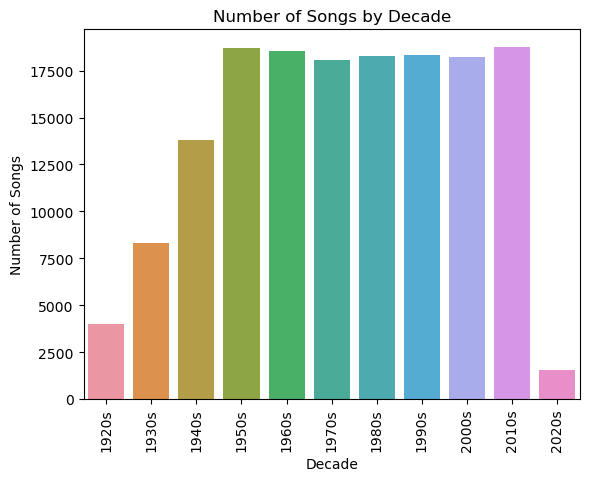

In [48]:
#Barchart to show the distribution of data by decade
#Setting decade and id as plot for barchart
ax = sns.barplot(data=data_1_count_by_decade, x='decade', y='id')
#rotating x axis labels to be vertical
plt.xticks(rotation=90)
#setting x,y, and title name
ax.set_ylabel('Number of Songs')
ax.set_xlabel('Decade')
ax.set_title('Number of Songs by Decade')
#showing plot
plt.show()

#### Distribution of songs looks a lot more even between the 1950s-2010s. The earlier years are lacking the quantity of songs.

### Distribution of data by song_key

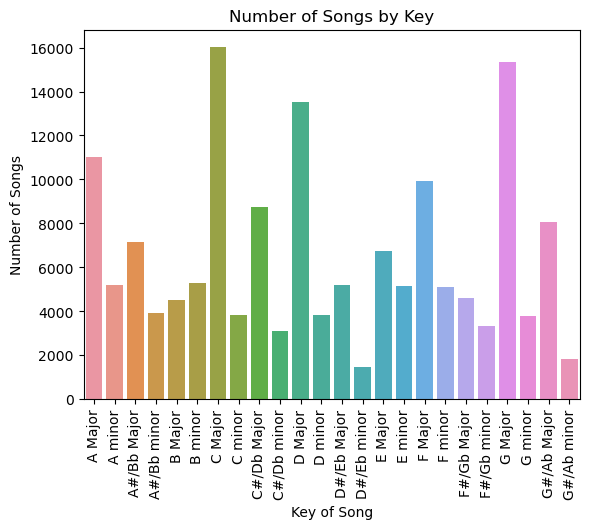

In [49]:
#Taking a look at the distribution of data by key
#Grouping data by song_key and counting the track ids
data_1_count_by_song_key = data_1.groupby(["song_key"], as_index=False)['id'].count()
#Barchart to show the distribution of data by song_key
#Setting song_key and id as plot for barchart
ax = sns.barplot(data=data_1_count_by_song_key, x='song_key', y='id')
#rotating x axis labels to be vertical
plt.xticks(rotation=90)
#setting x,y, and title name
ax.set_ylabel('Number of Songs')
ax.set_xlabel('Key of Song')
ax.set_title('Number of Songs by Key')
#showing plot
plt.show()

#### Major keys are the most common keys. It appears C Major, G Major, D Major, A Major, and F Major are the top 5 keys.

# Distribution of Data by Artist

In [50]:
#Number of unique artists in the primary_artist column
n = len(pd.unique(data_1['primary_artist']))
n
#There are 19689 different primary artists

19689

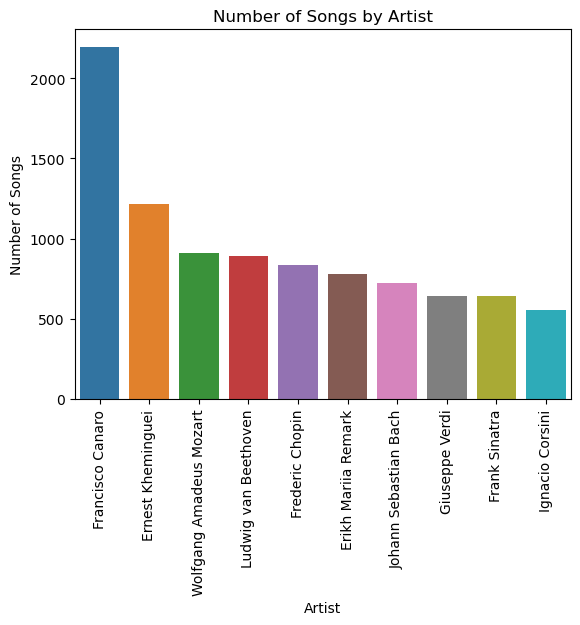

In [51]:
#Grouping primary artists by the number of songs 
data_1_count_by_artist = data_1.groupby(["primary_artist"], as_index=False)['id'].count().reset_index()
#Sorting the table by descending number of songs
data_1_count_by_artist_top_10 = data_1_count_by_artist.sort_values('id', ascending=False).head(10)
#Setting artist and id as plot for barchart
ax = sns.barplot(data=data_1_count_by_artist_top_10, x='primary_artist', y='id')
#rotating x axis labels to be vertical
plt.xticks(rotation=90)
#setting x,y, and title name
ax.set_ylabel('Number of Songs')
ax.set_xlabel('Artist')
ax.set_title('Number of Songs by Artist')
#showing plot
plt.show()

### It appears that Classical artists are the most prolific. This makes sense since Classical artists/composers have been around for hundreds of years and have thousands of pieces in their catalogs, where as popular artists have significantly smaller catalogs and have only been around for decades.

# Average Popularity by Artist

In [52]:
#grouping data by the average popularity of the primary artist
data_1_avg_pop_by_artist = data_1.groupby(["primary_artist"], as_index=False).agg(average_popularity=('popularity',np.mean)).reset_index()
#sorting the average popularity by artist df by descending popularity and listing the top 10
data_1_avg_pop_by_artist_top_10 = data_1_avg_pop_by_artist.sort_values('average_popularity', ascending=False).head(10)
#printing the results
data_1_avg_pop_by_artist_top_10

index  primary_artist  average_popularity
16305  16305       Surf Mesa                95.0
16015  16015  StaySolidRocky                94.0
18269  18269           Topic                92.0
14245  14245          Regard                90.0
14904  14904           S1mba                86.0
15033  15033     Sam Fischer                86.0
4631    4631     Dimelo Flow                86.0
12416  12416  Natalie Taylor                85.0
12463  12463             Nea                84.0
1452    1452            Ashe                84.0

### 2020 artists have the highest average popularity. This makes sense because the popularity metric is set when the data was pulled. This data set was pulled sometime during 2020. 

### Lets take a look at a different decade

In [53]:
decade_2000 = data_1.loc[(data_1.decade == '2000s')]
#grouping data by the average popularity of the primary artist
data_1_avg_pop_by_artist_2000 = decade_2000.groupby(["primary_artist"], as_index=False).agg(average_popularity=('popularity',np.mean)).reset_index()
#sorting the average popularity by artist df by descending popularity and listing the top 10
data_1_avg_pop_by_artist_top_10_2000 = data_1_avg_pop_by_artist_2000.sort_values('average_popularity', ascending=False).head(10)
#printing the results
data_1_avg_pop_by_artist_top_10_2000

index   primary_artist  average_popularity
633     633     Bonnie Tyler                76.0
4346   4346  The Proclaimers                74.0
1751   1751            Grits                74.0
1965   1965             Iyaz                74.0
2736   2736     Luis Enrique                73.0
218     218         Alice DJ                73.0
3920   3920   Stealers Wheel                73.0
1644   1644             Gala                72.0
521     521      Bill Medley                71.0
504     504          Big Boy                71.0

### Looks like Bonnie Tyler is the most popular artist for the 2000s

In [54]:
#Taking a look at the songs by Bonnie Tyler in the 2000s
data_1.loc[(data_1['primary_artist'] == 'Bonnie Tyler') & (data_1['decade'] == '2000s')]

acousticness  danceability  duration_ms  energy  explicit  \
77626         0.145         0.431       267360   0.723         0   

                           id  instrumentalness  key  liveness  loudness  \
77626  7wuJGgpTNzbUyn26IOY6rj               0.0    8     0.375    -5.887   

       mode  popularity release_date  speechiness    tempo  valence  year  \
77626     1          76   2009-03-26        0.056  130.547    0.189  2009   

            artists primary_artist                        name  \
77626  Bonnie Tyler   Bonnie Tyler  Total Eclipse of the Heart   

       duration_seconds decade     song_key  
77626             211.0  2000s  G#/Ab Major

### It appears that Bonnie Tyler only released one song in the 2000s and it has been quite popular.

# Loudness over Time

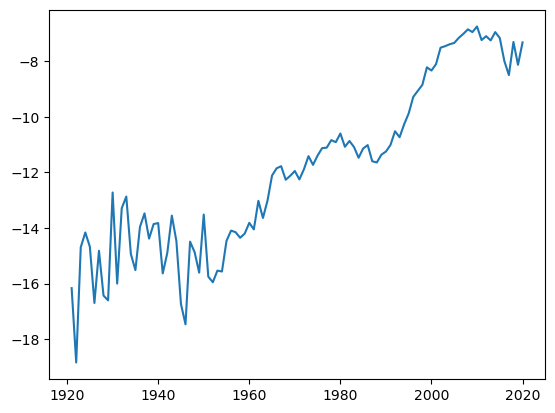

In [55]:
#Grouping data by average loudness by year
data_1_avg_loudness = data_1.groupby(["year"], as_index=False).agg(average_loudness=('loudness',np.mean))
#Plotting a line graph. xaxis is year and yaxis is average loudness
plt.plot(data_1_avg_loudness["year"], data_1_avg_loudness["average_loudness"])
#Showing graph
plt.show()

### Loudness is trending upwards. Average loudness peaks sometime in the mid/early 2000s. This shows the growing demand for consistanly loud music in popular music. 

# Exporting CSVs for Tableau Analysis

In [56]:
#finding the upper and lower quartile for popularity
#these quartiles will be subsetted and exported for analysis
data_1['popularity'].describe()
#Lower quartile is 12 and below
#Upper quartile is 48 and above

count    156608.000000
mean         31.287501
std          21.519560
min           0.000000
25%          12.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

In [57]:
#creating lower quartile and upper quartile subsets
lower_quartile_popularity = data_1.loc[(data_1.popularity <= 12)]
upper_quartile_popularity = data_1.loc[(data_1.popularity >= 48)]

In [58]:
#verifying that lower quartile subset worked
lower_quartile_popularity.popularity.describe()

count    40140.000000
mean         2.189238
std          3.674018
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         12.000000
Name: popularity, dtype: float64

In [59]:
#verifying that the upper quartile subset worked
upper_quartile_popularity.popularity.describe()

count    39756.000000
mean        58.156731
std          7.960348
min         48.000000
25%         52.000000
50%         57.000000
75%         63.000000
max        100.000000
Name: popularity, dtype: float64

In [60]:
#exporting entire cleaned dataset along with the upper/lower quartile popularity subsets
#data_1.to_csv('/Users/chadvonholtz/Desktop/Virginia Tech Fullstack Academy Data Analytics Bootcamp Documents/Capstone/Datasets/popular_music_analysis.csv')
#lower_quartile_popularity.to_csv('/Users/chadvonholtz/Desktop/Virginia Tech Fullstack Academy Data Analytics Bootcamp Documents/Capstone/Datasets/popular_music_analysis_lower_quartile.csv')
#upper_quartile_popularity.to_csv('/Users/chadvonholtz/Desktop/Virginia Tech Fullstack Academy Data Analytics Bootcamp Documents/Capstone/Datasets/popular_music_analysis_upper_quartile.csv')

# Checking The Hit Pop Song Formula

In [61]:
#subsetting with danceability greater than .5893
data_1_danceability = data_1.loc[(data_1.danceability >= .5893)]
#checking popularity
data_1_danceability.describe()
#avg pop = 35

acousticness  danceability   duration_ms        energy      explicit  \
count  64117.000000  64117.000000  6.411700e+04  64117.000000  64117.000000   
mean       0.406072      0.705246  2.172596e+05      0.530293      0.161673   
std        0.344052      0.082251  9.007668e+04      0.231469      0.368154   
min        0.000005      0.590000  1.530700e+04      0.002780      0.000000   
25%        0.081400      0.637000  1.676800e+05      0.348000      0.000000   
50%        0.314000      0.692000  2.046400e+05      0.543000      0.000000   
75%        0.726000      0.758000  2.523730e+05      0.715000      0.000000   
max        0.996000      0.988000  3.091373e+06      0.999000      1.000000   

       instrumentalness           key      liveness      loudness  \
count      64117.000000  64117.000000  64117.000000  64117.000000   
mean           0.093464      5.277789      0.186205    -10.229462   
std            0.236357      3.574727      0.153571      4.696399   
min            0.000000      0.000000      0.009670    -40.876000   
25%            0.000000      2.000000      0.090600    -13.020000   
50%            0.000023      5.000000      0.126000     -9.466000   
75%            0.007610      8.000000      0.238000     -6.638000   
max            0.993000     11.000000      0.997000      1.342000   

               mode    popularity   speechiness         tempo       valence  \
count  64117.000000  64117.000000  64117.000000  64117.000000  64117.000000   
mean       0.683048     35.316593      0.140732    115.209817      0.664709   
std        0.465292     22.028895      0.212714     24.243317      0.216789   
min        0.000000      0.000000      0.022200     32.800000      0.000000   
25%        0.000000     20.000000      0.037000     97.312000      0.518000   
50%        1.000000     38.000000      0.054000    114.602000      0.694000   
75%        1.000000     52.000000      0.128000    129.065000      0.843000   
max        1.000000     99.000000      0.969000    217.591000      1.000000   

               year  duration_seconds  
count  64117.000000      64117.000000  
mean    1981.663225        231.013678  
std       26.776646        119.838117  
min     1921.000000          6.000000  
25%     1961.000000        170.000000  
50%     1986.000000        208.000000  
75%     2004.000000        263.000000  
max     2020.000000       5404.000000

In [62]:
#adding energy to subset
data_1_d_e = data_1.loc[(data_1.danceability >= .5893) & (data_1.energy >= .6205)]
#checking popularity
data_1_d_e.describe()
#avg pop = 46

acousticness  danceability   duration_ms        energy      explicit  \
count  24860.000000  24860.000000  2.486000e+04  24860.000000  24860.000000   
mean       0.195931      0.708868  2.329703e+05      0.766538      0.198391   
std        0.217757      0.084043  7.499181e+04      0.094251      0.398796   
min        0.000005      0.590000  1.641600e+04      0.621000      0.000000   
25%        0.028800      0.639000  1.885260e+05      0.686000      0.000000   
50%        0.112000      0.695000  2.235175e+05      0.755000      0.000000   
75%        0.293000      0.766000  2.640000e+05      0.840000      0.000000   
max        0.996000      0.988000  1.601620e+06      0.999000      1.000000   

       instrumentalness           key      liveness      loudness  \
count      24860.000000  24860.000000  24860.000000  24860.000000   
mean           0.060100      5.368986      0.196564     -6.906001   
std            0.186170      3.605514      0.167350      2.652699   
min            0.000000      0.000000      0.009670    -20.611000   
25%            0.000000      2.000000      0.085300     -8.451000   
50%            0.000013      6.000000      0.132000     -6.502000   
75%            0.002330      9.000000      0.269000     -4.999000   
max            0.993000     11.000000      0.997000      1.342000   

               mode    popularity   speechiness         tempo       valence  \
count  24860.000000  24860.000000  24860.000000  24860.000000  24860.000000   
mean       0.651046     45.897184      0.096226    118.157216      0.705475   
std        0.476649     15.988422      0.098290     23.385167      0.206050   
min        0.000000      0.000000      0.022200     59.041000      0.017600   
25%        0.000000     36.000000      0.037000     99.986750      0.571000   
50%        1.000000     46.000000      0.052600    117.002500      0.741000   
75%        1.000000     57.000000      0.109000    130.771750      0.878000   
max        1.000000     99.000000      0.960000    217.591000      1.000000   

               year  duration_seconds  
count  24860.000000      24860.000000  
mean    1995.415447        231.458085  
std       17.918310        120.450105  
min     1921.000000          6.000000  
25%     1984.000000        169.000000  
50%     1999.000000        208.000000  
75%     2010.000000        264.000000  
max     2020.000000       2562.000000

In [63]:
#adding loudness to subset
data_1_d_e_l = data_1.loc[(data_1.danceability >= .5893) & (data_1.energy >= .6205) & (data_1.loudness >= -8.162)]
#checking popularity
data_1_d_e_l.describe()
#avg pop = 49

acousticness  danceability   duration_ms        energy      explicit  \
count  17931.000000  17931.000000  1.793100e+04  17931.000000  17931.000000   
mean       0.181121      0.712058  2.295122e+05      0.781361      0.245329   
std        0.205037      0.085066  6.622970e+04      0.094938      0.430294   
min        0.000005      0.590000  2.296200e+04      0.621000      0.000000   
25%        0.026200      0.641000  1.901750e+05      0.701000      0.000000   
50%        0.101000      0.698000  2.218400e+05      0.777000      0.000000   
75%        0.268000      0.770000  2.588135e+05      0.857000      0.000000   
max        0.993000      0.985000  1.293307e+06      0.999000      1.000000   

       instrumentalness           key      liveness      loudness  \
count      17931.000000  17931.000000  17931.000000  17931.000000   
mean           0.040134      5.383247      0.197386     -5.579344   
std            0.151001      3.616936      0.163205      1.501706   
min            0.000000      0.000000      0.010100     -8.162000   
25%            0.000000      2.000000      0.087500     -6.773000   
50%            0.000003      6.000000      0.135000     -5.662000   
75%            0.000567      9.000000      0.272000     -4.541000   
max            0.981000     11.000000      0.997000      1.342000   

               mode    popularity   speechiness         tempo       valence  \
count  17931.000000  17931.000000  17931.000000  17931.000000  17931.000000   
mean       0.641013     49.199598      0.100951    118.102563      0.684470   
std        0.479717     15.393896      0.095602     24.054570      0.209159   
min        0.000000      0.000000      0.022400     59.041000      0.036200   
25%        0.000000     40.000000      0.037700     98.827500      0.543000   
50%        1.000000     50.000000      0.056000    116.974000      0.714000   
75%        1.000000     60.000000      0.128000    131.415000      0.858000   
max        1.000000     99.000000      0.902000    216.538000      1.000000   

               year  duration_seconds  
count  17931.000000      17931.000000  
mean    1999.825330        232.904690  
std       16.796985        118.801716  
min     1921.000000          6.000000  
25%     1992.000000        170.000000  
50%     2004.000000        210.000000  
75%     2012.000000        266.000000  
max     2020.000000       2239.000000

In [64]:
#adding acoustiness to the subset
data_1_d_e_l_a = data_1.loc[(data_1.danceability >= .5893) & (data_1.energy >= .6205) & (data_1.loudness >= -8.162) & (data_1.acousticness <= .2760)]
#checking popularity
data_1_d_e_l_a.describe()
#avg pop = 51

acousticness  danceability   duration_ms        energy      explicit  \
count  13601.000000  13601.000000  1.360100e+04  13601.000000  13601.000000   
mean       0.082165      0.713626  2.332405e+05      0.789924      0.274318   
std        0.077013      0.086773  6.372652e+04      0.095400      0.446186   
min        0.000005      0.590000  2.296200e+04      0.621000      0.000000   
25%        0.016200      0.641000  1.962270e+05      0.711000      0.000000   
50%        0.056000      0.699000  2.251330e+05      0.790000      0.000000   
75%        0.134000      0.772000  2.604670e+05      0.867000      1.000000   
max        0.276000      0.982000  1.118920e+06      0.999000      1.000000   

       instrumentalness           key      liveness      loudness  \
count      13601.000000  13601.000000  13601.000000  13601.000000   
mean           0.038983      5.397544      0.197424     -5.502101   
std            0.146822      3.649874      0.161983      1.491134   
min            0.000000      0.000000      0.010100     -8.162000   
25%            0.000000      2.000000      0.086800     -6.671000   
50%            0.000003      6.000000      0.135000     -5.554000   
75%            0.000635      9.000000      0.275000     -4.460000   
max            0.981000     11.000000      0.997000      1.342000   

               mode    popularity   speechiness         tempo       valence  \
count  13601.000000  13601.000000  13601.000000  13601.000000  13601.000000   
mean       0.627307     51.096463      0.103606    118.383569      0.660298   
std        0.483539     13.718626      0.095974     24.005076      0.209268   
min        0.000000      0.000000      0.022700     59.972000      0.036200   
25%        0.000000     42.000000      0.038100     99.023000      0.519000   
50%        1.000000     51.000000      0.058100    117.422000      0.685000   
75%        1.000000     61.000000      0.136000    131.519000      0.829000   
max        1.000000     99.000000      0.856000    216.538000      1.000000   

               year  duration_seconds  
count  13601.000000      13601.000000  
mean    2002.428939        232.999485  
std       13.801837        118.261735  
min     1921.000000         15.000000  
25%     1996.000000        170.000000  
50%     2005.000000        210.000000  
75%     2013.000000        266.000000  
max     2020.000000       2239.000000

In [65]:
#adding instrumentalness to subset
data_1_d_e_l_a_i = data_1.loc[(data_1.danceability >= .5893) & (data_1.energy >= .6205) & (data_1.loudness >= -8.162) & (data_1.acousticness <= .2760) & (data_1.instrumentalness <= .07327)]
#checking popularity
data_1_d_e_l_a_i.describe()
#avg pop = 51.7

acousticness  danceability    duration_ms        energy      explicit  \
count  12478.000000  12478.000000   12478.000000  12478.000000  12478.000000   
mean       0.084155      0.715106  230646.509377      0.787228      0.292835   
std        0.076999      0.087097   58385.526332      0.094651      0.455082   
min        0.000013      0.590000   22962.000000      0.621000      0.000000   
25%        0.017800      0.642000  195746.500000      0.708000      0.000000   
50%        0.059150      0.701000  223806.500000      0.787000      0.000000   
75%        0.137000      0.774000  257773.000000      0.864000      1.000000   
max        0.276000      0.982000  998280.000000      0.999000      1.000000   

       instrumentalness           key      liveness      loudness  \
count      12478.000000  12478.000000  12478.000000  12478.000000   
mean           0.002494      5.390207      0.198145     -5.446158   
std            0.009006      3.649739      0.161265      1.482777   
min            0.000000      0.000000      0.010100     -8.162000   
25%            0.000000      2.000000      0.087500     -6.596000   
50%            0.000001      6.000000      0.137000     -5.477000   
75%            0.000151      9.000000      0.277000     -4.404250   
max            0.072700     11.000000      0.997000      0.674000   

               mode    popularity  speechiness         tempo       valence  \
count  12478.000000  12478.000000  12478.00000  12478.000000  12478.000000   
mean       0.628146     51.693220      0.10727    118.183663      0.661381   
std        0.483319     13.449747      0.09810     24.360332      0.206131   
min        0.000000      0.000000      0.02270     59.972000      0.037900   
25%        0.000000     43.000000      0.03860     98.126000      0.523000   
50%        1.000000     51.000000      0.06060    116.929500      0.684000   
75%        1.000000     61.000000      0.14600    131.954250      0.827000   
max        1.000000     99.000000      0.85600    216.538000      0.996000   

               year  duration_seconds  
count  12478.000000      12478.000000  
mean    2003.148822        233.282818  
std       13.223890        116.795533  
min     1921.000000         20.000000  
25%     1996.000000        171.000000  
50%     2006.000000        211.000000  
75%     2013.000000        267.000000  
max     2020.000000       2168.000000

In [66]:
#establishing formula
data_1_formula = data_1.loc[(data_1.danceability >= .5893) & (data_1.energy >= .6205) & (data_1.loudness >= -8.162) & (data_1.acousticness <= .2760) & (data_1.instrumentalness <= .07327) & (data_1.tempo >= 120)]
#checking popularity
data_1_formula.describe()
#avg pop = 53

acousticness  danceability    duration_ms       energy    explicit  \
count   5585.000000   5585.000000    5585.000000  5585.000000  5585.00000   
mean       0.080526      0.705754  227286.736795     0.791379     0.29060   
std        0.076333      0.084370   57987.740725     0.096449     0.45408   
min        0.000016      0.590000   40840.000000     0.621000     0.00000   
25%        0.016000      0.635000  192600.000000     0.710000     0.00000   
50%        0.053800      0.692000  221027.000000     0.793000     0.00000   
75%        0.131000      0.760000  253000.000000     0.871000     1.00000   
max        0.276000      0.978000  941107.000000     0.999000     1.00000   

       instrumentalness          key     liveness     loudness         mode  \
count       5585.000000  5585.000000  5585.000000  5585.000000  5585.000000   
mean           0.002647     5.359355     0.197949    -5.424369     0.627574   
std            0.009218     3.681533     0.158865     1.495717     0.483494   
min            0.000000     0.000000     0.010100    -8.157000     0.000000   
25%            0.000000     2.000000     0.088700    -6.570000     0.000000   
50%            0.000002     6.000000     0.137000    -5.468000     1.000000   
75%            0.000176     9.000000     0.275000    -4.367000     1.000000   
max            0.072700    11.000000     0.995000     0.402000     1.000000   

        popularity  speechiness        tempo      valence         year  \
count  5585.000000  5585.000000  5585.000000  5585.000000  5585.000000   
mean     52.368666     0.104288   139.929581     0.666815  2003.762936   
std      13.741629     0.097973    17.437760     0.216602    13.845986   
min       0.000000     0.024500   120.000000     0.038700  1921.000000   
25%      43.000000     0.039000   126.609000     0.516000  1997.000000   
50%      52.000000     0.058700   134.199000     0.696000  2008.000000   
75%      62.000000     0.133000   149.258000     0.848000  2014.000000   
max      94.000000     0.856000   216.538000     0.994000  2020.000000   

       duration_seconds  
count       5585.000000  
mean         232.683080  
std          117.534218  
min           21.000000  
25%          170.000000  
50%          210.000000  
75%          267.000000  
max         1806.000000